In [32]:
# Import Python libraries for data manipuation and visualization

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as pyplot
import networkx as nx
import csv
import networkx as nx
import math



# Import the Python machine learning libraries we need

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from math import sqrt

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor


# Import some convenience functions.  This can be found on the course github

data_df = pd.read_csv('chicago-traffic-tracker-historical-congestion-estimates-by-segment-2018.csv')
data_df['DATE'] = pd.to_datetime(data_df['DATE'])
data_df['DATE']=data_df['DATE'].map(dt.datetime.toordinal)

In [33]:
# with open('Testing 1.csv') as f:
#    # edges = [tuple(line) for line in csv.reader(f)]
#    for line in csv.reader(f):
#         print(line)
data_test = pd.read_csv("Testing_2.csv")
# for value in data_test["DATE"]:
#     print("NOTHING")
data_from = getattr(data_test,"FROM_STREET","NO_ADDRESS")
data_to = getattr(data_test,"TO_STREET","NO_ADDRESS")
i=0
edges=[]
for value in data_test["FROM_STREET"]:
    i= i+1
edges = [ (data_from[answer],data_to[answer]) for answer in range(0,i)]
   # print(data_test['TO_STREET'].astype('string'))
# print(type(data_test['FROM_STREET']))

In [34]:
nodes = []
for items in data_from:
    if items not in nodes:
        nodes.append(items)
        
for items in data_to:
    if items not in nodes:
        nodes.append(items)
        
print(nodes)

['Ohio', 'Randolph', 'Congress', 'Fullerton', 'Lake Shore Dr Michigan Exit Ramp', 'Wacker', 'North Ave', 'Michigan', 'Jackson', 'Halsted', 'State', 'Chicago', 'Roosevelt', 'Diversey', 'Vincennes', 'Division', 'Foster', 'Belmont', '16th', 'Van Buren', 'Columbus', 'Lawrence', '18th', 'Lake Shore Dr', 'Wentworth', 'Illinois', '18TH', 'Madison', '31st', 'Oak St', 'LakeShore Dr', 'Grand Ave', 'Oakwood', 'Grand', 'I-55 Expy', 'Damen', 'Clark', 'Balbo', 'Bryn Mawr', 'Lake', '63rd', 'Irving Park', 'Milwaukee', 'Monroe', 'Franklin', 'Ashland', '103rd', '43rd', '47th', 'Peterson', 'LaSalle', 'Western', '79th', 'Addison', '59th', 'Cermak', 'Montrose', '67th', 'Dr Martin L King Jr', 'Cottage Grove', 'Clarendon', '71st', '51st', '55th', '91st', 'Racine', '75th', 'Washington', 'Hollywood', 'Dan Ryan Expy', 'Jefferson', 'Kostner', '35th', '26th', 'Harrison', 'Narragansett', 'Michigain', 'Lake Shore Dr Michigan Entrance Ramp', 'Stevenson Expy', 'Central', '95th', 'Canal', 'Columbus Ave', 'Forest Prese

In [35]:
data_df.dropna(inplace=True)
indices_to_keep = ~data_df.isin([np.nan, np.inf, -np.inf]).any(1)

    
X = data_df[["SEGMENT_ID","DATE","TIME"]]
print(X)
y = data_df["BUS_COUNT"]

# Split into test and training sets
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)
# z1_train, z1_test, z2_train, z2_test =  train_test_split(X, y, test_size=test_size, random_state=seed)*

         SEGMENT_ID    DATE  TIME
0              1090  736767    23
1              1090  736768    23
2              1090  736769    23
3              1082  736770    23
4              1090  736770    23
...             ...     ...   ...
1048570         921  736768    17
1048571         921  736768     9
1048572         908  736767    17
1048573         908  736769    17
1048574         922  736773     8

[1048575 rows x 3 columns]


In [36]:
model = RandomForestRegressor()
# Fit model to the data
model.fit(X_train.values, y_train)

RandomForestRegressor()

In [37]:
y_predict = model.predict(X_test)
print(y_predict)

C:\Users\navid\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


[1.02217857 1.4923373  0.59247222 ... 0.         2.24360806 1.52839683]


In [38]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: ", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_predict)
print("MAE: ", mae)

RMSE:  0.8349878663459027
MAE:  0.5665230744205886


In [39]:
data_segement =  getattr(data_test,"SEGMENT_ID")
segement = [ (data_from[answer],data_to[answer],data_segement[answer]) for answer in range(0,i)]

In [40]:
data_length = getattr(data_test,"LENGTH")
length = [ (data_segement[answer],data_length[answer]) for answer in range(0,i) ]
# print( [(data_segement[12], data_length[12]) for answer in ]   )

In [41]:
def get_segmentId(from_location, to_location):
    for i in segement:
        if(i[0] == from_location and  i[1] == to_location)or(i[1] == from_location and  i[0] == to_location):
            return i[2]

In [42]:
def get_length(SEGMENT_ID):
    for i in length:
        if(i[0] == SEGMENT_ID ):
            return i[1]

In [43]:
# Create Graph using appropriate nodes and edges

G = nx.Graph()
# print(G.nodes()) # returns a list
# print(G.edges()) # returns a list

# print(output)

G.add_nodes_from(nodes)
# nx.set_node_attributes(G,values=10,name= 'test')


G.add_edges_from(edges)

# nx.set_edge_attributes(G, values = 100, name = 'road_size')


In [53]:
from_input = input('From: ')
dest_input = input('Destination: ')

year = int(input('Enter a year: '))
month = int(input('Enter a month: '))
day = int(input('Enter a day: '))
date1 = dt.date(year, month, day)
date_input = dt.datetime.toordinal(date1)

time_input = input('Input time - (1-24) for\n1. 12-1 AM\n2. 1-2 AM\n3. 2-3 AM\n4. 3-4 AM\n5. 4-5 AM\n6. 5-6 AM\n7. 6-7 AM\n8. 7-8 AM\n9. 8-9 AM\n10. 9-10 AM\n11. 10-11 AM\n12. 11-12 AM\n13. 12-1 PM\n14. 1-2 PM\n15. 2-3 PM\n16. 3-4 PM\n17. 4-5 PM\n18. 5-6 PM\n19. 6-7 PM\n20. 7-8 PM\n21. 8-9 PM\n22. 9-10 PM\n23. 10-11 PM\n24. 11-12 PM\n')

# Shortest path lists
shortest_path_list = list(nx.all_shortest_paths(G, from_input, dest_input))
print("All Shortest Path Lists: ")
print(shortest_path_list)

# # All simple path lists
# all_simple_paths = list(nx.all_simple_paths(G, from_input, dest_input))
# print("All Simple Path Lists: ")
# print(all_simple_paths)

From: Ohio
Destination: Canal
Enter a year: 2024
Enter a month: 5
Enter a day: 6
Input time - (1-24) for
1. 12-1 AM
2. 1-2 AM
3. 2-3 AM
4. 3-4 AM
5. 4-5 AM
6. 5-6 AM
7. 6-7 AM
8. 7-8 AM
9. 8-9 AM
10. 9-10 AM
11. 10-11 AM
12. 11-12 AM
13. 12-1 PM
14. 1-2 PM
15. 2-3 PM
16. 3-4 PM
17. 4-5 PM
18. 5-6 PM
19. 6-7 PM
20. 7-8 PM
21. 8-9 PM
22. 9-10 PM
23. 10-11 PM
24. 11-12 PM
12
All Shortest Path Lists: 
[['Ohio', 'Randolph', 'Congress', 'Wacker', 'Halsted', 'Canal'], ['Ohio', 'Randolph', 'Grand', 'Wacker', 'Halsted', 'Canal']]


In [54]:
for i in shortest_path_list:
    j=1
    time_data =int(time_input)

    for x in range(1,len(i)):
        SEGMENT_ID =get_segmentId(i[j-1],i[j])
        from_loc = i[j-1]
        to_loc = i[j]
        update_segement = G[from_loc][to_loc]
        update_node = G.nodes[to_loc]
        
        predictions = model.predict([[SEGMENT_ID, date_input, time_data]])
            
        num_of_vechicles =(math.ceil(predictions))
        update_segement.update({'weight': num_of_vechicles})
        update_node.update({'values' :num_of_vechicles })
       
        if(time_data == 24):
            time_data = -1
        time_data = time_data + 1
        j=j+1

In [55]:
for i in shortest_path_list:
    j=1
    time_data =int(time_input)
    for x in range(1,len(i)):
        SEGMENT_ID =get_segmentId(i[j-1],i[j])
        dataset_length = get_length(SEGMENT_ID)
        from_loc = i[j-1]
        to_loc = i[j]
        
        update_segement = G[from_loc][to_loc]
        update_segement.update({'road_size': dataset_length})
        j=j+1

In [56]:
nx.get_edge_attributes(G,name='weight')


{('Ohio', 'Randolph'): 8,
 ('Randolph', 'Congress'): 13,
 ('Randolph', 'Grand'): 1,
 ('Congress', 'Wacker'): 6,
 ('Wacker', 'Halsted'): 10,
 ('Wacker', 'Grand'): 1,
 ('Halsted', 'Canal'): 6}

In [57]:
nx.get_node_attributes(G, name = 'values')

{'Ohio': 30,
 'Randolph': 8,
 'Congress': 13,
 'Wacker': 1,
 'Halsted': 10,
 'Grand': 1,
 'Canal': 6}

In [58]:
nx.get_edge_attributes(G,name='road_size')

{('Ohio', 'Randolph'): 0.56,
 ('Randolph', 'Congress'): 0.6,
 ('Randolph', 'Grand'): 0.51,
 ('Congress', 'Wacker'): 0.77,
 ('Wacker', 'Halsted'): 0.54,
 ('Wacker', 'Grand'): 0.32,
 ('Halsted', 'Canal'): 0.4}

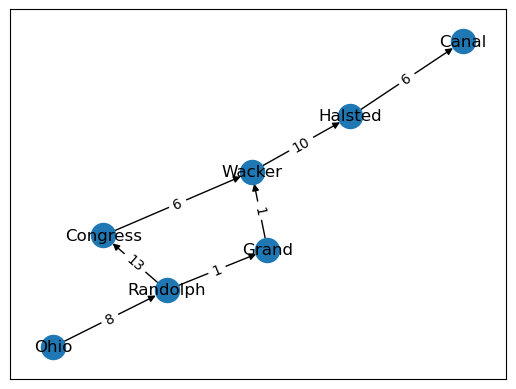

In [59]:
tree = nx.DiGraph()

# Add the destination node as the root of the tree
tree.add_node(from_input)

# For each path in all_simple_paths
for path in shortest_path_list:
    # For each node along the path, starting from the end node
    for i in range(len(path)-1, 0, -1):
        # If the node is not already in the tree, add it
        if not tree.has_node(path[i]):
            tree.add_node(path[i])
        # Add an edge from the current node to its parent node
        tree.add_edge(path[i-1], path[i])

        
        
import matplotlib.pyplot as plt
import networkx as nx

# Get the node positions for plotting
pos = nx.spring_layout(tree)

# Draw the nodes

nx.draw_networkx_nodes(tree, pos)


# node_labels = nx.get_node_attributes(G,'values')
# nx.draw_networkx_labels(G, pos, labels = node_labels)


# Draw the edges
nx.draw_networkx_edges(tree, pos)

# Label the nodes
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos,labels)

labels = {node: node for node in tree.nodes}
nx.draw_networkx_labels(tree, pos, labels)

# Show the plot
plt.show()

In [60]:
# result = [(0, 'Ohio'), (1, 'Randolph'), (2, '1550 West'), (2, 'Congress'), (2, 'Grand')]
result = []
def dfs(graph, start, level=0):
    visited, stack = set(), [(start, level)]
    while stack:
        vertex, level = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
    
            answer = (level,vertex)
            result.append(answer)
            for neighbour in graph[vertex]:
                stack.append((neighbour, level+1))

dfs(tree, from_input)


result.sort()
print(result)

total_congestion = 0
ratio_array = []
congestion_array = []
# input_vehicle = G[result[i][1]][result[y][1]['weight']
G.nodes[result[0][1]]['values'] = 30
how_many_times = result[-1][0]
total_road_size = 0
total_bus_count = 0

for i in range(0,len(result)):
    input_vehicle = G.nodes[result[i][1]]['values']
    answer = result[i][0]    
    for y in range(i+1,len(result)):
        answer2 = result[y][0]-1
        if(answer == answer2):
            try:
                bus_count = G[result[i][1]][result[y][1]]['weight']
                print(bus_count)
                road_size = G[result[i][1]][result[y][1]]['road_size']
                print(road_size)
                total_road_size = total_road_size + road_size
                total_bus_count = total_bus_count + bus_count
                
#                 average_congestion = values/road_size           
#                 congestion_array.append((average_congestion,result[i][1],result[y][1]))
#                 total_congestion = total_congestion + average_congestion

            except Exception as e:
                print(e)
                print("NO connection made")
            
        elif( answer < answer2):
            break;
        
    if (total_bus_count == 0):
        total_bus_count = 1
    ratio = total_bus_count/total_road_size
    print(f"Ratio: {ratio}")
    
    for z in range(i+1,len(result)):
        answer2 = result[z][0]-1
        if(answer == answer2):
            try:
                bus_count = G[result[i][1]][result[z][1]]['weight']
                road_size = G[result[i][1]][result[z][1]]['road_size']
                
                allocated_bus = math.ceil(road_size*ratio)
                print(result[z][1])
                print(f"Allcated bus: {allocated_bus}")
                update_segement = G[result[i][1]][result[z][1]]
                update_segement.update({'weight': allocated_bus})
            except:
                print("NO connection")
            
        elif( answer < answer2):
            break;
            
            




[(0, 'Ohio'), (1, 'Randolph'), (2, 'Congress'), (2, 'Grand'), (3, 'Wacker'), (4, 'Halsted'), (5, 'Canal')]
8
0.56
Ratio: 14.285714285714285
Randolph
Allcated bus: 8
13
0.6
1
0.51
Ratio: 13.173652694610777
Congress
Allcated bus: 8
Grand
Allcated bus: 7
6
0.77
Ratio: 11.475409836065571
Wacker
Allcated bus: 9
1
0.32
Ratio: 10.507246376811594
Wacker
Allcated bus: 4
10
0.54
Ratio: 11.818181818181817
Halsted
Allcated bus: 7
6
0.4
Ratio: 12.162162162162161
Canal
Allcated bus: 5
Ratio: 12.162162162162161


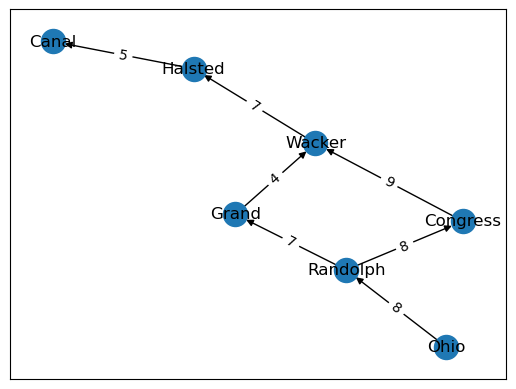

In [61]:
pos = nx.spring_layout(tree)

# Draw the nodes

nx.draw_networkx_nodes(tree, pos)


# node_labels = nx.get_node_attributes(G,'values')
# nx.draw_networkx_labels(G, pos, labels = node_labels)


# Draw the edges
nx.draw_networkx_edges(tree, pos)

# Label the nodes
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos,labels)

labels = {node: node for node in tree.nodes}
nx.draw_networkx_labels(tree, pos, labels)

# Show the plot
plt.show()